<a href="https://colab.research.google.com/github/tangpnm/AI_CountingCoin/blob/master/Panumas_60130500237_multiclass_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Check the GPU**

## ** 4. Keras MLP (MNIST)** 

In [5]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [6]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
<class 'numpy.float64'> <class 'numpy.uint8'>
5


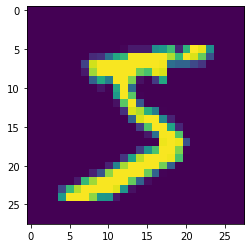

In [7]:
print(x_train.shape, y_train.shape, x_test.shape,y_test.shape)
print(type(x_train[0,0,0]), type(y_train[0]))
plt.imshow(x_train[0,:,:])
print(y_train[0])

In [8]:
model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(128, activation='relu'),
  Dropout(0.2),
  Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2967 - accuracy: 0.9137
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1445 - accuracy: 0.9576
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1079 - accuracy: 0.9669
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0886 - accuracy: 0.9725
Epoch 5/5
313/313 [==============================] - 0s 2ms/step - loss: 0.0786 - accuracy: 0.9763


[0.07857406884431839, 0.9763000011444092]


# **5. Keras CNN (MNIST) **

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
#
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

In [11]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print(x_train.shape, y_train.shape, x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [12]:
# reshape data to fit model
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
# one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(x_train.shape, y_train.shape, x_test.shape,y_test.shape)

(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


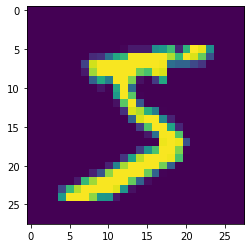

In [13]:
print(type(x_train), type(y_train))
plt.imshow(np.reshape(x_train[0,],(28,28)))
print(y_train[0])

In [14]:
model = Sequential([
  Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
  Conv2D(32, kernel_size=3, activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Flatten(),
  Dense(128, activation='relu'),
  Dropout(0.2),
  Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [15]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1307 - accuracy: 0.9603 - val_loss: 0.0510 - val_accuracy: 0.9836
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0468 - accuracy: 0.9861 - val_loss: 0.0338 - val_accuracy: 0.9892
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0326 - accuracy: 0.9897 - val_loss: 0.0344 - val_accuracy: 0.9885


In [16]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0344 - accuracy: 0.9885


[0.03442317247390747, 0.9884999990463257]